## DSC640-T302

## Assignment 2.2

## Lincoln Brown

## Professor Williams

## Import Libraries

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import squarify

## Import Datasets

In [14]:
expenditures_df = pd.read_excel('./ex2-2/expenditures.xlsx')

In [15]:
expenditures_df

,year,category,expenditure
0,2008,Food,6443
1,2008,Alcoholic Beverages,444
2,2008,Housing,17109
3,2008,Apparel,1801
4,2008,Transportation,8604
...,...,...,...
345,1984,Education,303
346,1984,Tobacco Products,228
347,1984,Miscellaneous,451
348,1984,Cash Contributions,706


In [16]:
# Make a copy of the dataset
top_expenditures_df = expenditures_df.copy()
# Group by year and then get the top 3 categories for each year
top_expenditures_df = (expenditures_df.groupby('year').apply(lambda x: x.nlargest(3, 'expenditure'))
                       .reset_index(drop=True))
# Display the first 5 rows
top_expenditures_df.head()

,year,category,expenditure
0,1984,Housing,6674
1,1984,Transportation,4304
2,1984,Food,3290
3,1985,Housing,7087
4,1985,Transportation,4587


In [17]:
# Save the dataset for use in other programs
top_expenditures_df.to_csv('top_expenditures.csv')

In [46]:
# Load the World Population Dataset
world_pop_df = pd.read_excel("./Ex2-2/world-population.xlsm")
world_pop_df.head()

,Year,Population
0,1960,3028654024
1,1961,3068356747
2,1962,3121963107
3,1963,3187471383
4,1964,3253112403


In [98]:
# Load the unemployment dataset
unemployment_df = pd.read_csv('./ex2-2/unemployement-rate-1948-2010.csv')
unemployment_df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


## Tree Map

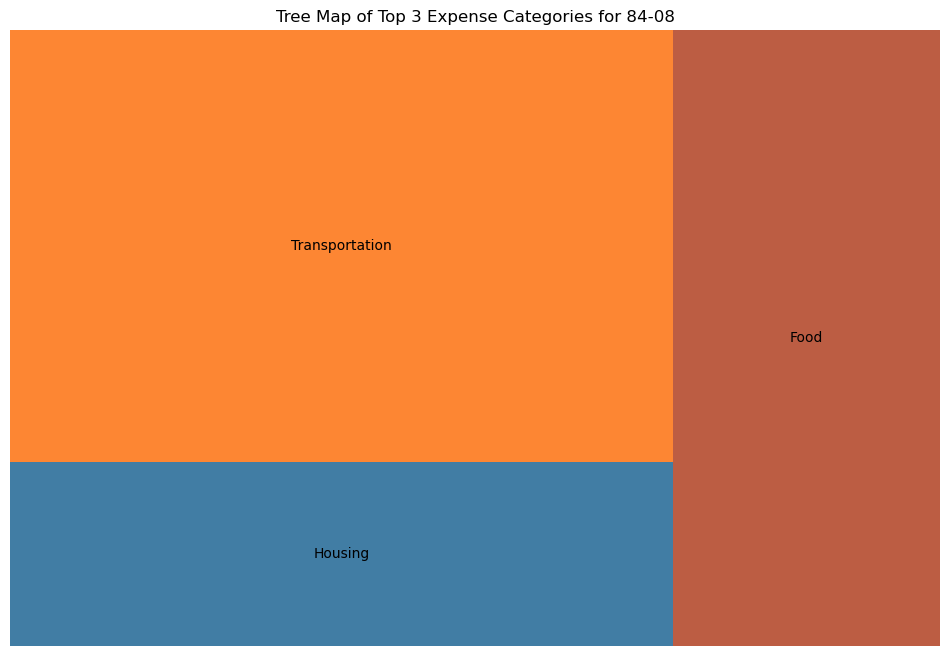

In [31]:
# create the labels and sizes
labels = top_expenditures_df['category'].unique()
sizes = top_expenditures_df.groupby('category')['expenditure'].sum()
colors = ['#115d8e', '#fd6800', '#ab3414']
# Plot a tree map
plt.figure(figsize=(12,8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8, )
plt.title(f'Tree Map of Top 3 Expense Categories for 84-08')
plt.axis('off')
plt.show()

## Area Chart

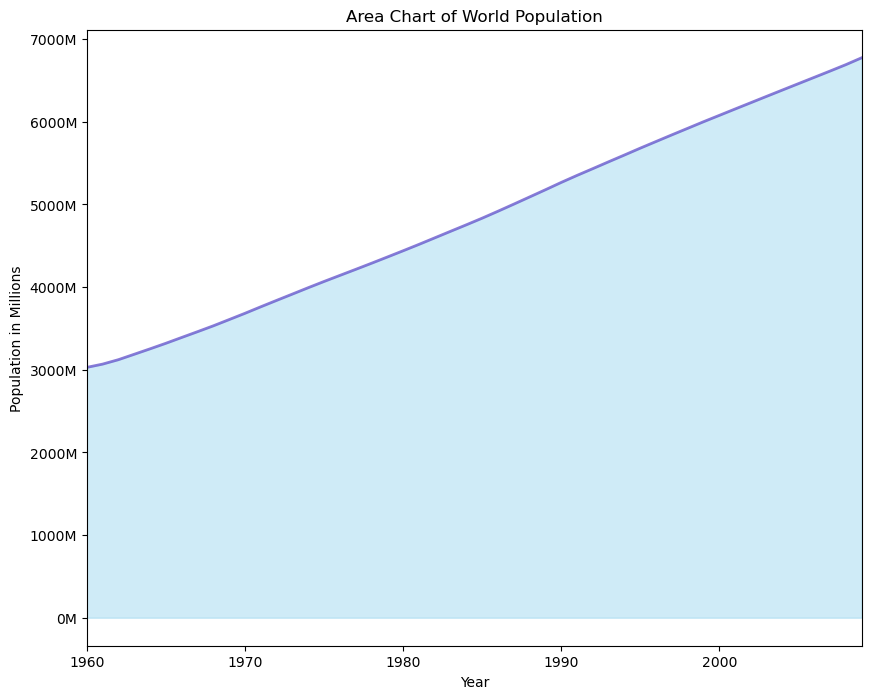

In [114]:
# Create an area chart of the World Population
def millions_formatter(x, pos):
    return '{:.0f}M'.format(x / 1e6)

plt.figure(figsize=(10,8))
plt.fill_between(world_pop_df['Year'], world_pop_df['Population'], color='skyblue', alpha=0.4)
plt.plot(world_pop_df['Year'], world_pop_df['Population'], color='slateblue', alpha=0.8, linewidth=2)
plt.title('Area Chart of World Population')
plt.xlabel('Year')
plt.ylabel('Population in Millions')
# Remove whitespace
plt.margins(x=0)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

## Stacked Area Chart

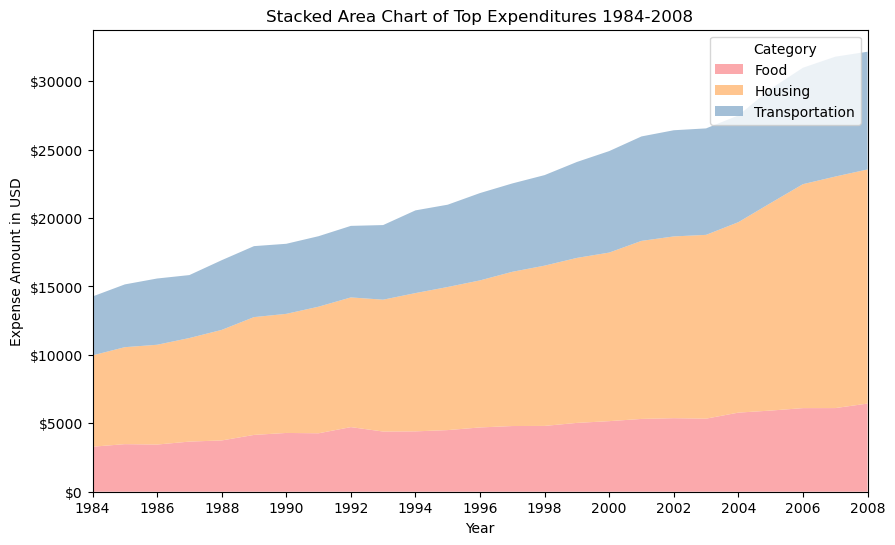

In [115]:
# Aggregate the expenditure categories by year
aggregated_df = top_expenditures_df.groupby(['year', 'category'])['expenditure'].sum().unstack()

# Transpose the data for use in the stackplot
transposed_agg_df = aggregated_df.T

# Plot the stacked area chart
fig, ax = plt.subplots(figsize=(10,6))
categories = transposed_agg_df.index
colors = ['#fb9498', '#ffb773', '#8cafcd']
years = aggregated_df.index
ax.stackplot(years, transposed_agg_df.values, labels=categories, alpha = 0.8, colors = colors)
ax.set_title('Stacked Area Chart of Top Expenditures 1984-2008')
ax.set_xlabel('Year')
ax.set_ylabel('Expense Amount in USD')
ax.legend(title='Category')
# Remove whitespace
ax.margins(x=0)
# Set the y axis to use currency format
ax.yaxis.set_major_formatter('${x:1.0f}')
# Set the x ticks
ax.set_xticks(ticks=range(years.min(), years.max() + 1, 2))
plt.show()

## Step Chart

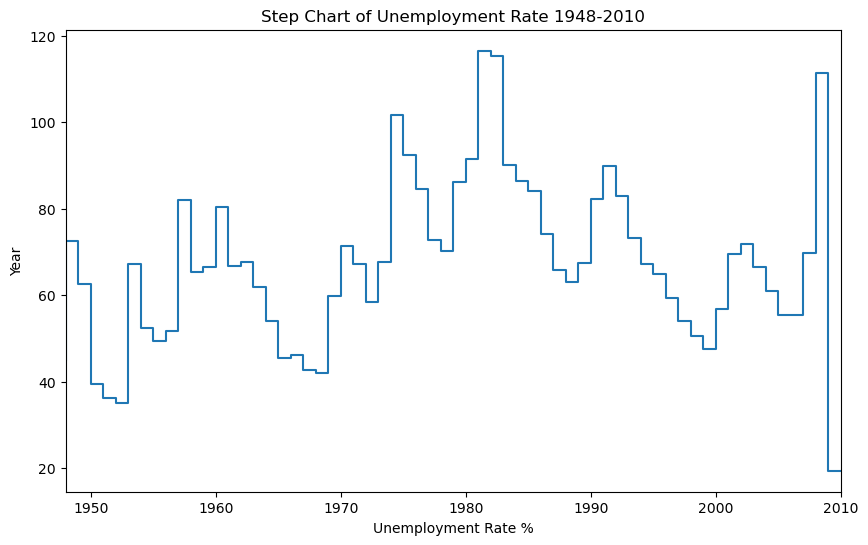

In [101]:
# Step Chart of Unemployment
# Get the sum of each yearly value
yearly_values = unemployment_df.groupby('Year')['Value'].sum()
# Get a list of unique years
years = unemployment_df['Year'].unique()

# Create the Step Graph
plt.figure(figsize=(10,6))
plt.step(x=years, y=yearly_values)
plt.title('Step Chart of Unemployment Rate 1948-2010')
plt.xlabel('Unemployment Rate %')
plt.ylabel('Year')
plt.margins(x=0)
plt.show()